### Import libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt
import seaborn as sns

### Customize

In [5]:
# Customize parameters
my_file_path = "0903 Transaction_data.csv"
my_anomaly_file = "0903 anomalous_transactions.csv"
my_plot_file = "0903 anomaly_detection_plot.png"
no_of_clusters=2
my_normal_percentage=98

### Prepare data

In [7]:
#  Load the transaction dataset
df = pd.read_csv(my_file_path)

# Clean the data
# Convert non-numeric values to NaN and drop them
df["TransactionAmount"] = pd.to_numeric(df["TransactionAmount"], errors='coerce')
df["TransactionHour"] = pd.to_numeric(df["TransactionHour"], errors='coerce')
df = df.dropna(subset=["TransactionAmount", "TransactionHour"]).copy()

# Normalize the features
# Standardizing ensures fair comparison of scales across features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[["TransactionAmount", "TransactionHour"]])

### Apply KMeans clustering

In [9]:
# Group transactions into two clusters (normal vs potential outliers)
kmeans = KMeans(n_clusters=no_of_clusters, random_state=42)
df["Cluster"] = kmeans.fit_predict(scaled_features)

# Calculate the distance of each transaction to its cluster center
# Transactions far from their center are potential anomalies
_, distances = pairwise_distances_argmin_min(scaled_features, kmeans.cluster_centers_)
df["DistanceToCenter"] = distances

# Flag top percentage of transactions with highest distance as anomalies
threshold = np.percentile(distances, my_normal_percentage)
df["PredictedAnomaly"] = df["DistanceToCenter"] > threshold


### Save and display results

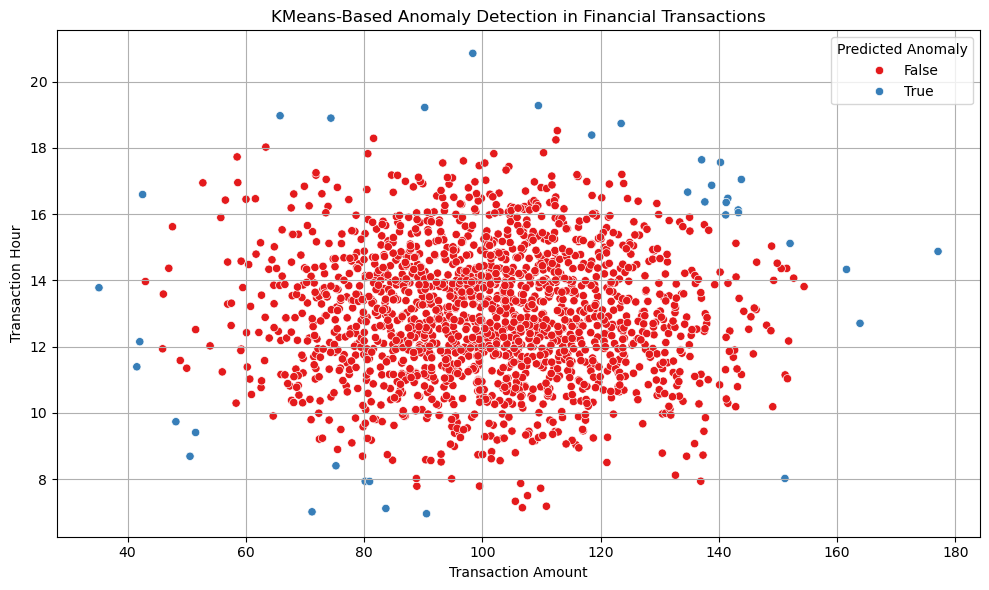

Anomaly detection completed.
Visualization saved to: 0903 anomaly_detection_plot.png
Anomalous transactions saved to: 0903 anomalous_transactions.csv


In [11]:

# Save and display the anomaly detection plot

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="TransactionAmount",
    y="TransactionHour",
    hue="PredictedAnomaly",
    data=df,
    palette="Set1"
)
plt.title("KMeans-Based Anomaly Detection in Financial Transactions")
plt.xlabel("Transaction Amount")
plt.ylabel("Transaction Hour")
plt.legend(title="Predicted Anomaly")
plt.grid(True)
plt.tight_layout()
plt.savefig(my_plot_file)  # Save to file
plt.show()              # Show the chart interactively


# Save anomalous transactions to a CSV file
df[df["PredictedAnomaly"] == True].to_csv(my_anomaly_file, index=False)

print(f"Anomaly detection completed.")
print(f"Visualization saved to: {my_plot_file}")
print(f"Anomalous transactions saved to: {my_anomaly_file}")
